In [8]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pickle
from scipy import optimize
import seaborn as sns
from matplotlib.colors import LogNorm
import itertools
import math
palette=sns.color_palette()

fparams =  {'xtick.labelsize': 22,
            'ytick.labelsize': 22,
            'axes.labelsize': 26,
            'axes.titlesize': 22,
            'font.size': 22,
            'legend.fontsize': 20,
            'text.usetex': True,
            'legend.frameon' : False,
            'svg.fonttype': 'path',
            'lines.linewidth': 2.5,
             
            'lines.markersize': 10}

plt.rcParams.update(fparams)

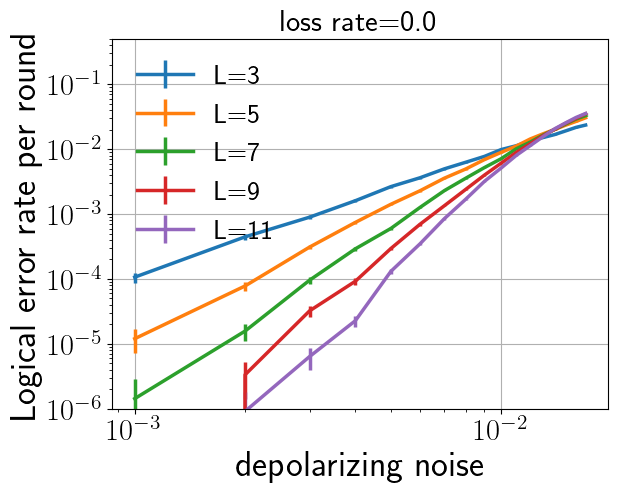

In [9]:
#Logical error rate at a fixed loss rate

Ls = range(3,13,2)#list of distances to plot
loss=0.0#loss probability

log_errors_all= []
depo_all=[]
num_shots_all=[]

#load the results
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_Z_bias_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        

#plot the results
plt.figure()
for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    
    #compute the logical error per round and the associate derror bar
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
    plt.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
plt.xlabel("depolarizing noise")
plt.ylabel("Logical error rate per round")
plt.title('loss rate={}'.format(loss))
plt.grid()
plt.yscale("log")
plt.xscale('log')
#plt.xlim(0.003,0.007)
plt.ylim(10**(-6),0.5)
plt.legend(loc=0);

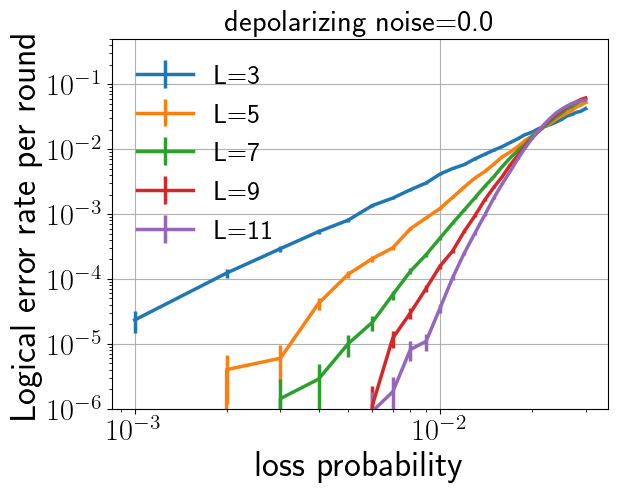

In [10]:
#Logical error rate at a fixed depolarizing noise probability


Ls = range(3,13,2)#list of distances to plot
depo=0.0 #depolarizing noise probability

log_errors_all= []
loss_rate_all=[]
num_shots_all=[]


#load the results
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_Z_bias_d=({},{})_rounds={}_depo_noise={}.pkl'.format(L,L,L,depo), 'rb') as fp:
        data_saved=pickle.load(fp)
    loss_rate=sorted(list(data_saved.keys()))
    for p in loss_rate:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    loss_rate_all.append(loss_rate)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        

#plot the results
plt.figure()
for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,loss_rate_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
    
    plt.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
plt.xlabel("loss probability")
plt.ylabel("Logical error rate per round")
plt.title('depolarizing noise={}'.format(depo))
plt.grid()
plt.yscale("log")
plt.xscale('log')
plt.ylim(10**(-6),0.5)
plt.legend(loc=0);

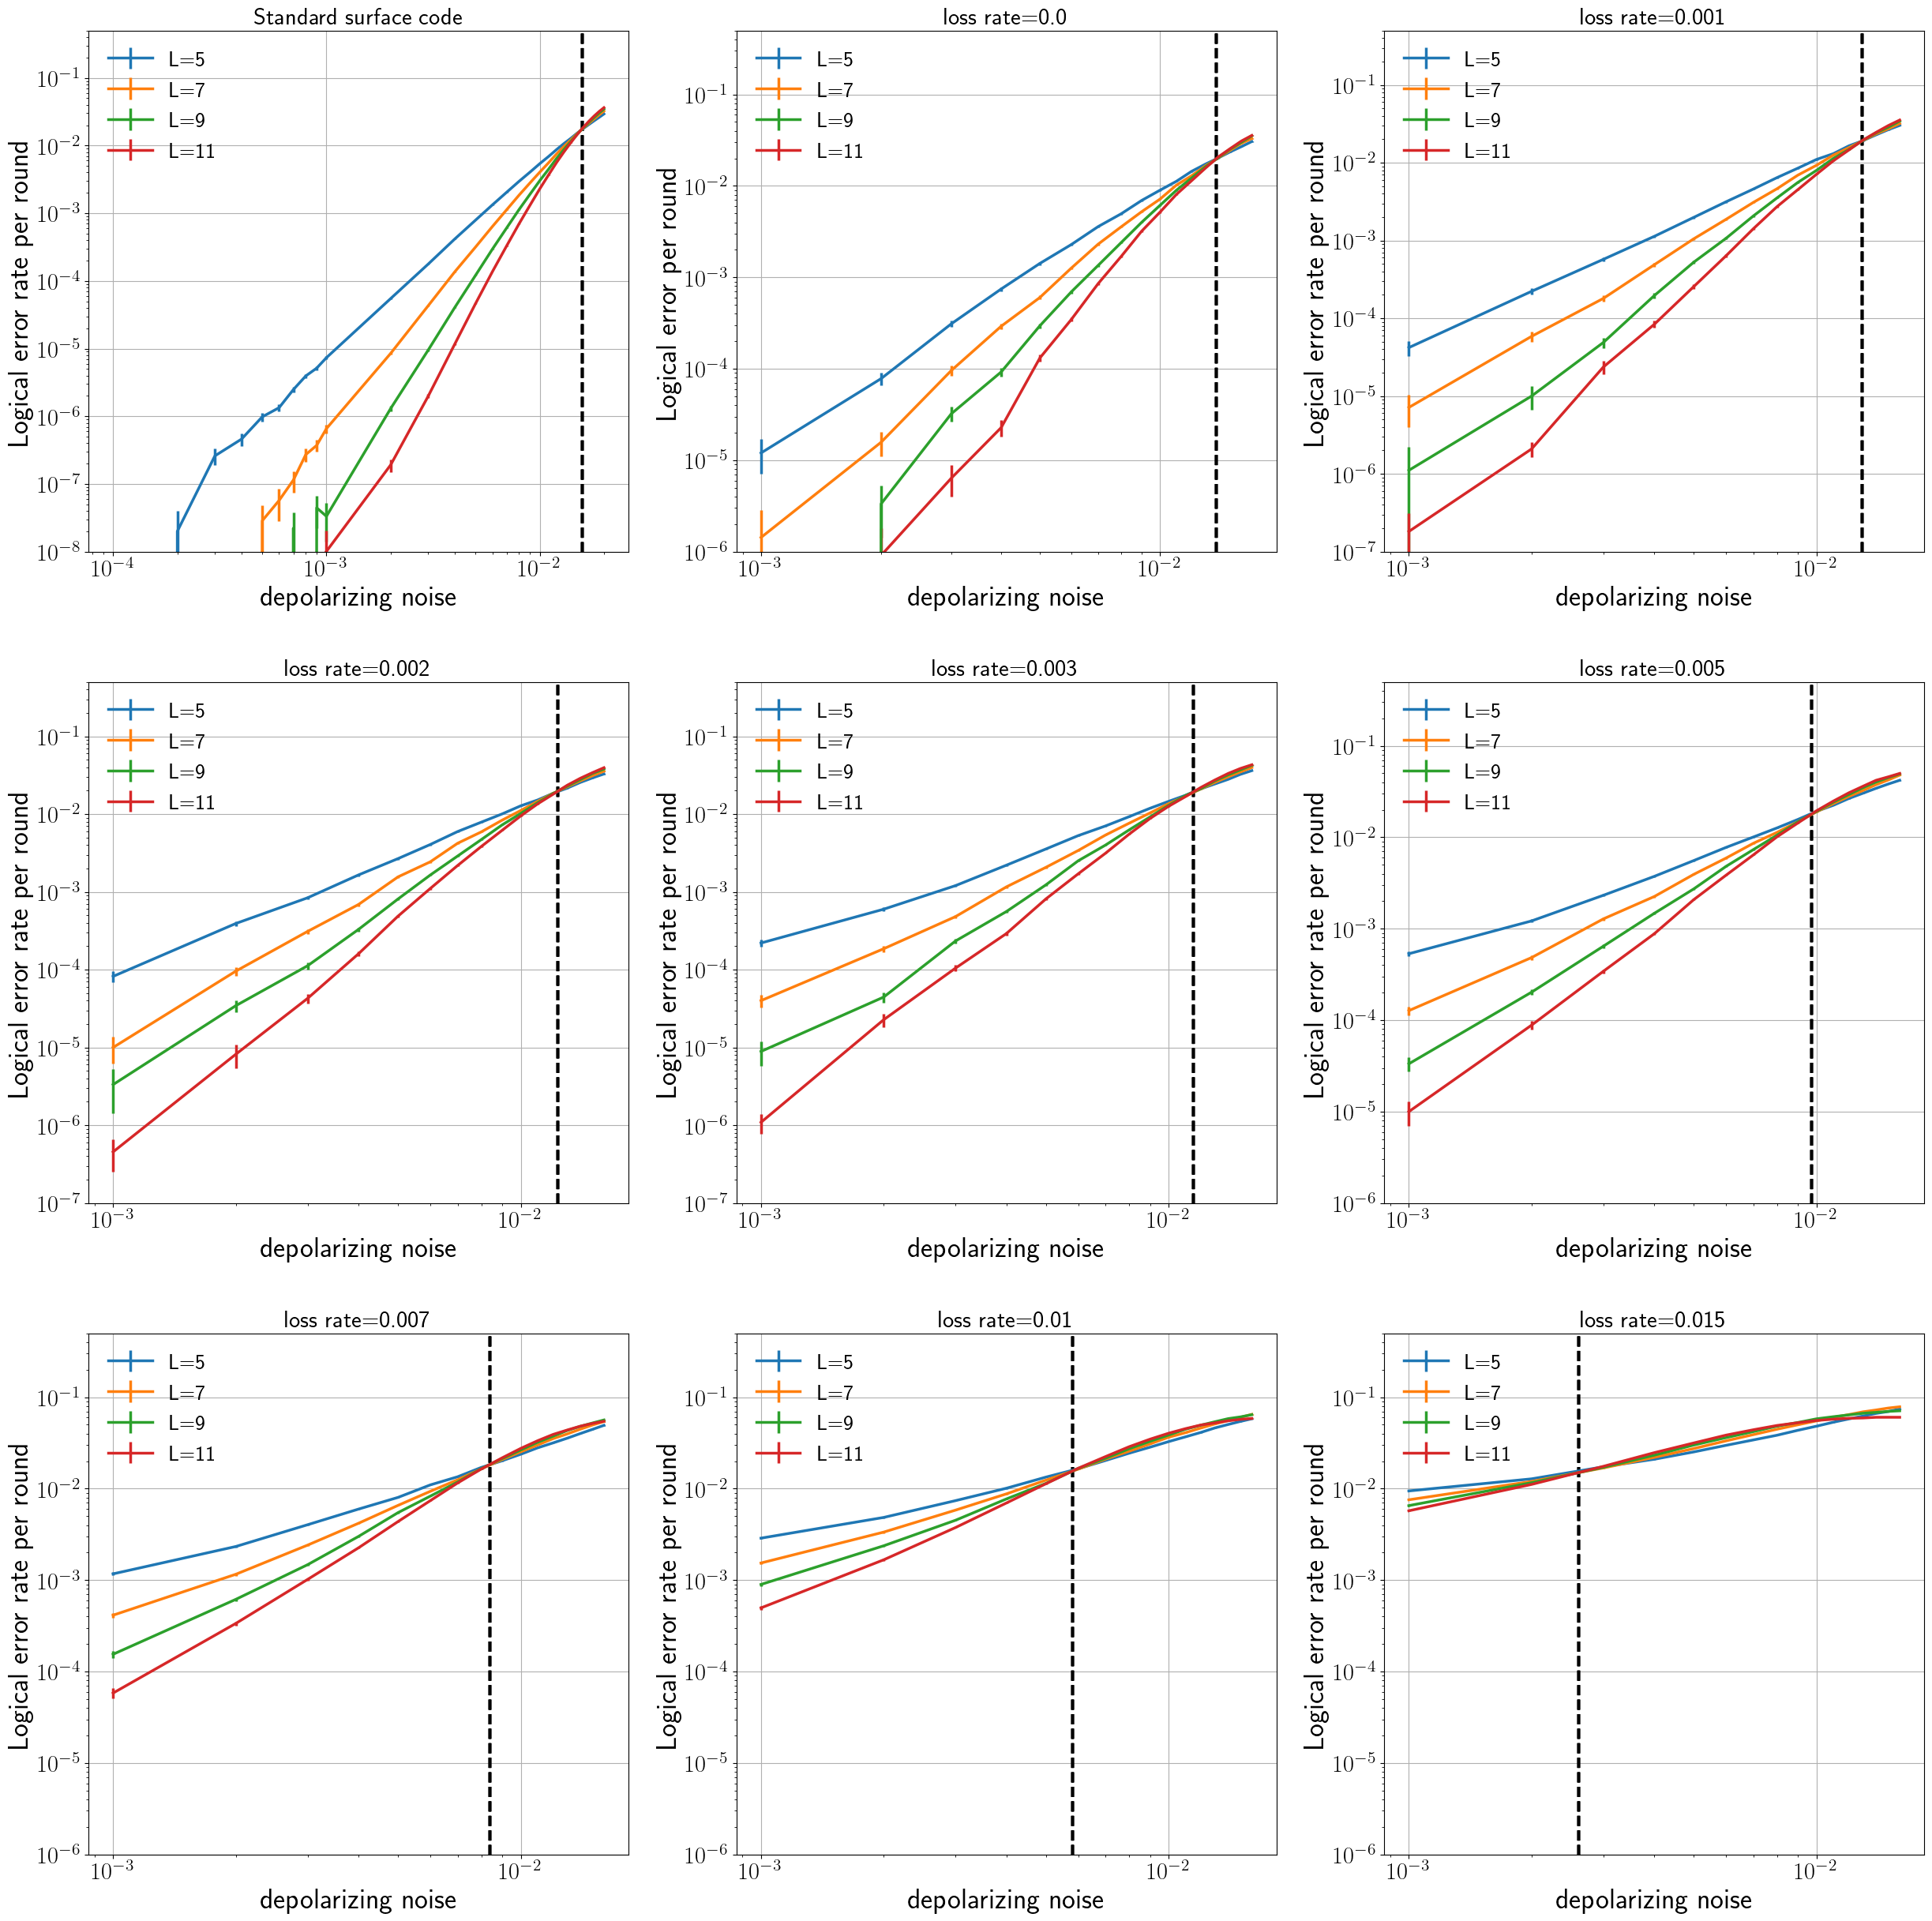

In [11]:
#logical error at various loss proabilities

from matplotlib.markers import MarkerStyle
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset




fig = plt.figure(figsize=(30, 30))
table = gridspec.GridSpec(ncols=3, nrows=3)


ax1 = fig.add_subplot(table[0, 0])

ax2 = fig.add_subplot(table[0, 1])

ax3 = fig.add_subplot(table[0, 2])

ax4 = fig.add_subplot(table[1, 0])

ax5 = fig.add_subplot(table[1, 1])

ax6 = fig.add_subplot(table[1, 2])

ax7 = fig.add_subplot(table[2, 0])

ax8 = fig.add_subplot(table[2, 1])

ax9 = fig.add_subplot(table[2, 2])


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]

for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_standard_surface_code_d={}.pkl'.format(L), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)


for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
   
    ax1.axvline(x=0.0158,linestyle='--',color='black')
    
    
    ax1.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
ax1.set_xlabel("depolarizing noise")
ax1.set_ylabel("Logical error rate per round")
ax1.set_title('Standard surface code')
ax1.grid()
ax1.set_yscale("log")
ax1.set_xscale('log')
ax1.set_ylim(10**(-8),0.5)
ax1.legend(loc=0);





Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.00
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_Z_bias_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    

for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    ax2.axvline(x=0.0138,linestyle='--',color='black')
   
    
    ax2.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))

ax2.set_xlabel("depolarizing noise")
ax2.set_ylabel("Logical error  per round")
ax2.set_title('loss rate={}'.format(loss))
ax2.grid()
ax2.set_yscale("log")
ax2.set_xscale('log')
ax2.set_ylim(10**(-6),0.5)
ax2.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.001
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_Z_bias_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    ax3.axvline(x=0.0129,linestyle='--',color='black')
    
    ax3.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax3.set_xlabel("depolarizing noise")
ax3.set_ylabel("Logical error rate per round")
ax3.set_title('loss rate={}'.format(loss))
ax3.grid()
ax3.set_yscale("log")
ax3.set_xscale('log')
ax3.set_ylim(10**(-7),0.5)
ax3.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.002
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_Z_bias_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
   
    ax4.axvline(x=0.0123,linestyle='--',color='black')
   
    ax4.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax4.set_xlabel("depolarizing noise")
ax4.set_ylabel("Logical error rate per round")
ax4.set_title('loss rate={}'.format(loss))
ax4.grid()
ax4.set_yscale("log")
ax4.set_xscale('log')
ax4.set_ylim(10**(-7),0.5)
ax4.legend(loc=0);


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.003
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_Z_bias_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
   
    ax5.axvline(x=0.0115,linestyle='--',color='black')
   
    ax5.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax5.set_xlabel("depolarizing noise")
ax5.set_ylabel("Logical error rate per round")
ax5.set_title('loss rate={}'.format(loss))
ax5.grid()
ax5.set_yscale("log")
ax5.set_xscale('log')
ax5.set_ylim(10**(-7),0.5)
ax5.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.005
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_Z_bias_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
   
    ax6.axvline(x=0.0097,linestyle='--',color='black')
   
    ax6.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax6.set_xlabel("depolarizing noise")
ax6.set_ylabel("Logical error rate per round")
ax6.set_title('loss rate={}'.format(loss))
ax6.grid()
ax6.set_yscale("log")
ax6.set_xscale('log')
ax6.set_ylim(10**(-6),0.5)
ax6.legend(loc=0);


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.007
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_Z_bias_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
   
    ax7.axvline(x=0.0084,linestyle='--',color='black')
   
    ax7.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax7.set_xlabel("depolarizing noise")
ax7.set_ylabel("Logical error rate per round")
ax7.set_title('loss rate={}'.format(loss))
ax7.grid()
ax7.set_yscale("log")
ax7.set_xscale('log')
ax7.set_ylim(10**(-6),0.5)
ax7.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.01
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_Z_bias_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        


for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    ax8.axvline(x=0.0058,linestyle='--',color='black')
   
    ax8.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax8.set_xlabel("depolarizing noise")
ax8.set_ylabel("Logical error rate per round")
ax8.set_title('loss rate={}'.format(loss))
ax8.grid()
ax8.set_yscale("log")
ax8.set_xscale('log')
ax8.set_ylim(10**(-6),0.5)
ax8.legend(loc=0);


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.015
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_Z_bias_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        


for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    ax9.axvline(x=0.0026,linestyle='--',color='black')
   
    ax9.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax9.set_xlabel("depolarizing noise")
ax9.set_ylabel("Logical error rate per round")
ax9.set_title('loss rate={}'.format(loss))
ax9.grid()
ax9.set_yscale("log")
ax9.set_xscale('log')
ax9.set_ylim(10**(-6),0.5)
ax9.legend(loc=0);




table.update(hspace=0.25)

# Plot for the article

[ 29.94751906 934.66418928]
[2.31668527e+02 1.04316531e+05 5.72218094e-04]
[1.64285571e-13 2.32915707e+06 1.88949546e+08 1.96082288e-05]
[5.89305185e-19 4.75452024e+00 1.05851658e+10 3.53418503e+11
 3.70804963e+08]
[1.39659701e+02 2.21456098e+04 2.55883434e+04 3.63983640e+13
 2.11457237e+06 5.68748076e+16]


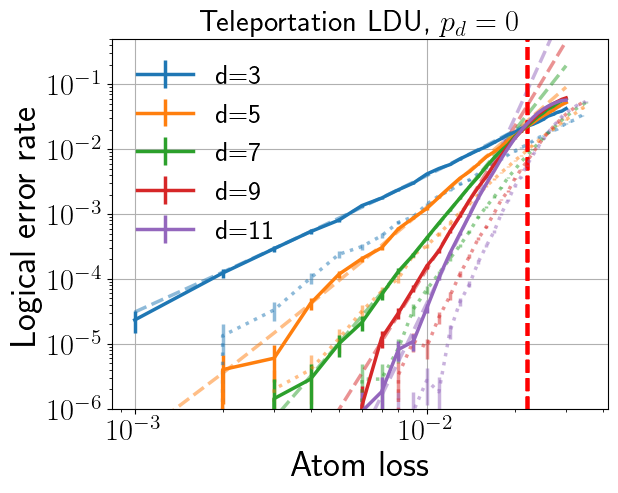

In [12]:
#Logical error rate at vanishing depolarizing noise

#first fit function
def power_law(x,a,b):
    return a*x**b

Ls = range(3,13,2)#distance list

#load results with Z bias noise on the neighbouring qubit
depo=0.0 #depolarizing noise probability
log_errors_all= []
loss_rate_all=[]
num_shots_all=[]
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_Z_bias_d=({},{})_rounds={}_depo_noise={}.pkl'.format(L,L,L,depo), 'rb') as fp:
        data_saved=pickle.load(fp)
    loss_rate=sorted(list(data_saved.keys()))
    for p in loss_rate:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    loss_rate_all.append(loss_rate)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)


#load results without Z bias noise on the neighbouring qubit
log_errors_simple_all= []
loss_rate_simple_all=[]
num_shots_simple_all=[]
depo=0 #depolarizing noise probability
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_depo_noise={}.pkl'.format(L,L,L,depo), 'rb') as fp:
        data_saved=pickle.load(fp)
    loss_rate=sorted(list(data_saved.keys()))
    for p in loss_rate:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    loss_rate_simple_all.append(loss_rate)
    log_errors_simple_all.append(log_errors)
    num_shots_simple_all.append(num_shots_list)
    
        
#windows for the fit
windows_fit=[[0,14],[2,14],[2,14],[5,14],[7,14]]

#Plot results
plt.figure()
for k,(L, log_errors,num_shots_list,p,log_errors_simple,num_shots_simple_list,p_simple) in enumerate(zip(Ls, log_errors_all,num_shots_all,loss_rate_all,log_errors_simple_all,num_shots_simple_all,loss_rate_simple_all)):
    
    #logical error rate per round and its associated error bar for the loss model with Z bias noise
    std_err = [(error*(1-error)/num_shots)**0.5 for error,num_shots in zip(log_errors,num_shots_list)]
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]


    #Fit (first with a free power law to help finding the right coefficient for the second fit with a sum of power law from (L+1)/2 to L)
    l0=int((Ls[0]-3)/2)
    w1=windows_fit[k+l0][0]
    w2=windows_fit[k+l0][1]

    fit0,cov_fit0=scipy.optimize.curve_fit(power_law,p[w1:w2],errors_per_round[w1:w2],sigma=std_err[w1:w2],absolute_sigma=True)
    powlen=L+1-int((L+1)/2)
    def power_law2(x,*a):
        return sum(a[k-int((L+1)/2)]*x**k for k in range(int((L+1)/2),L+1))

    
    fit1,cov_fit1=scipy.optimize.curve_fit(power_law2,p[w1:w2],errors_per_round[w1:w2],sigma=std_err[w1:w2],absolute_sigma=True,p0=[fit0[0]]*powlen,bounds=[[0]*powlen,[math.inf]*powlen])
    plt.plot(p,power_law2(np.array(p),*fit1),'--',alpha=0.5,color=palette[k])
    print(fit1)
    
    plt.axvline(x=0.022,linestyle='--',color='red')
    
    plt.errorbar(p, np.array(errors_per_round),linestyle='-',color=palette[k], yerr=std_err, label="d={}".format(L))


    #logical error rate per round and its associated error bar for the loss model without Z bias noise
    std_err_simple = [(error*(1-error)/num_shots)**0.5 for error,num_shots in zip(log_errors_simple,num_shots_simple_list)]
    errors_per_round_simple=[1-(1-error)**(1/L) for error in log_errors_simple]
    successes_per_round_simple=[(1-error)**(1/L) for error in log_errors_simple]
    successes_simple=[(1-error) for error in log_errors_simple]
    std_err_simple = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors_simple,num_shots_simple_list,successes_per_round_simple,successes_simple)]

    plt.errorbar(p_simple, np.array(errors_per_round_simple),linestyle=':',alpha=0.5,color=palette[k], yerr=std_err_simple)
    
plt.xlabel("Atom loss")
plt.ylabel("Logical error rate ")
plt.title(r'Teleportation LDU, $p_d=0$')
plt.grid()
plt.yscale("log")
plt.xscale('log')
plt.ylim(10**(-6),0.5)
plt.legend();

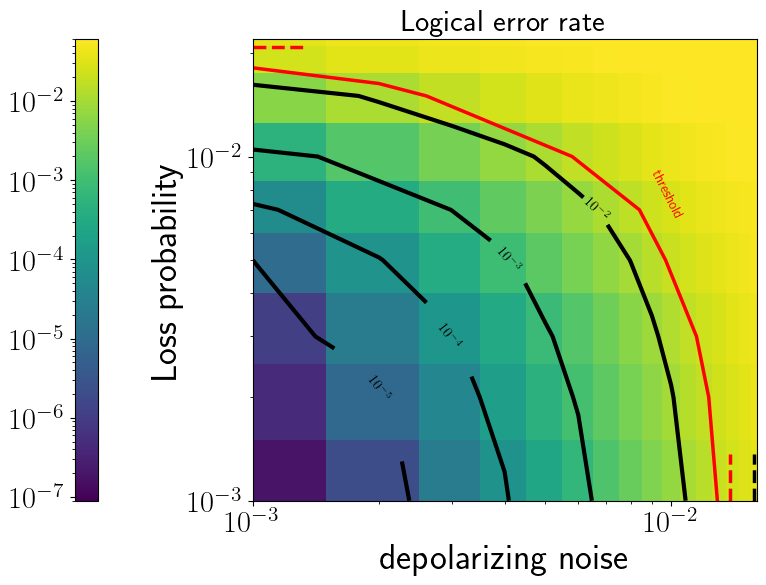

In [14]:
#Color map of the logical error rate for finite depolarizing noise and atom loss probabilities in Log-Log scale



#threshold line
threshold_depo=[0.0129,0.0123,0.0115,0.0097,0.0084,0.0058,0.0026,0.002,0.001]
threshold_loss=[0.001,0.002,0.003,0.005,0.007,0.01,0.015,0.0163,0.0181]

L = 11 #distance of the code

log_errors_all= []
depo_max=0.016 #maximal depolarizing noise plotted
loss_rate = [0.001,0.002,0.003,0.005,0.007,0.01,0.015,0.02,0.022] #list of loss probabilities
depo_all = []
num_shots_all=[]
loss_rate_all = []

#Load results
for loss in loss_rate:
    log_errors=[]

    with open('data/logical_error//logical_error_teleportation_LDU_Z_bias_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    depo2=[]
    num_shots_list=[]
    for p in depo:
        
        if p<=depo_max:
            depo2.append(p)
            log_errors.append(data_saved[p]['error_rate'])

    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]

    depo_all.append(depo2)
    log_errors_all.append(errors_per_round)
    loss_rate_all.append([loss]*len(depo2))


#color bar scale
cmap = plt.get_cmap('viridis')
norm = LogNorm(vmin=9e-8, vmax=max(list(itertools.chain.from_iterable(log_errors_all))))

# Create the main plot
fig, ax_main = plt.subplots(figsize=(10, 6))
pcm = ax_main.pcolormesh(depo_all, loss_rate_all, log_errors_all, shading='auto', cmap=cmap, norm=norm)
cbar = fig.colorbar(pcm, ax=ax_main, location='left', pad=0.2)

# Define contour levels
contour_levels = [1e-5, 1e-4, 1e-3, 1e-2]
contour_levels_text = [r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$']
fmt = {level: txt for level, txt in zip(contour_levels, contour_levels_text)}
contours = ax_main.contour(depo_all, loss_rate_all, log_errors_all, levels=contour_levels, colors='k', linewidths=3)

# Add labels to the contours with proper formatting
ax_main.clabel(contours, inline=True, fontsize=10, fmt=fmt)

# Plot threshold
ax_main.plot(threshold_depo, threshold_loss, '-', color='red')
ax_main.text(0.009, 0.009, r'threshold', color='r', fontsize=10,rotation=-63, rotation_mode='anchor')

ax_main.axvline(x=0.0138,ymin=-0,ymax=0.1,linestyle='--',color='red')
ax_main.axvline(x=0.0158,ymin=-0,ymax=0.1,linestyle='--',color='black')
ax_main.axhline(y=0.0208,xmin=-0,xmax=0.1,linestyle='--',color='red')

ax_main.set_xscale('log')
ax_main.set_yscale('log')

ax_main.set_ylim([1e-3, 2.2e-2])
ax_main.set_xlim([1e-3, 1.6e-2])
ax_main.set_xlabel('depolarizing noise')
ax_main.set_ylabel('Loss probability')
ax_main.set_title('Logical error rate')

plt.show()
